In [1]:
import sys
print(sys.executable)


c:\Users\ASUS\ml_pixel_prediction\venv\Scripts\python.exe


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


### Dataset generation



In [17]:
import numpy as np

def generate_dataset(num_samples=10000, img_size=50):
    images = []
    labels = []

    for _ in range(num_samples):
        img = np.zeros((img_size, img_size), dtype=np.uint8)

        # Random pixel coordinates
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)

        # Set only one white pixel
        img[y, x] = 255

        images.append(img)
        labels.append([x, y])

    return np.array(images), np.array(labels)


X, y = generate_dataset()

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)


Dataset shape: (10000, 50, 50)
Labels shape: (10000, 2)


### Training Testing split

In [18]:
from sklearn.model_selection import train_test_split

# Normalize pixel values
X = X / 255.0

# Reshape for CNN input
X = X.reshape(-1, 50, 50, 1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8000, 50, 50, 1)
Test shape: (2000, 50, 50, 1)


### CNN model design

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(50, 50, 1)),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 172.3049 - mae: 9.6077 - val_loss: 32.8311 - val_mae: 3.7246
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 23.4046 - mae: 3.1245 - val_loss: 16.1255 - val_mae: 2.6882
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 13.4284 - mae: 2.4872 - val_loss: 11.4407 - val_mae: 2.3983
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.5503 - mae: 2.1398 - val_loss: 7.7935 - val_mae: 1.9044
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.9188 - mae: 1.8034 - val_loss: 5.4948 - val_mae: 1.5542
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.6963 - mae: 1.4310 - val_loss: 4.6795 - val_mae: 1.5319
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.1152 - mae: 1.1373 - val_loss: 2.5902 - val_mae: 1.0245
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.1160 - mae: 0.9396 - val_loss: 1.8670 - val_mae: 0.8794
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3

### Loss graph

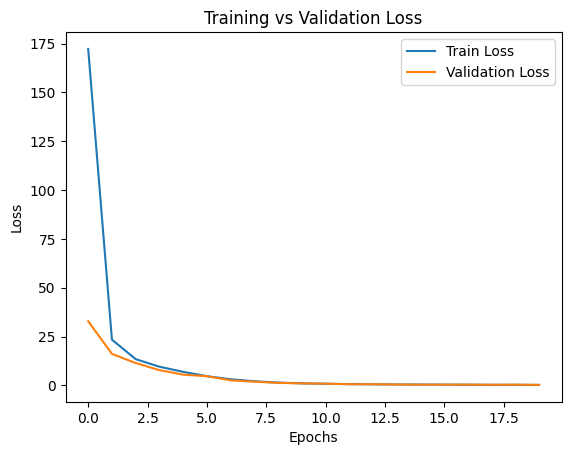

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


### Prediction visualization

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


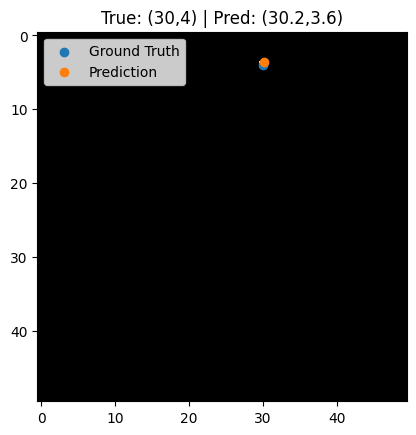

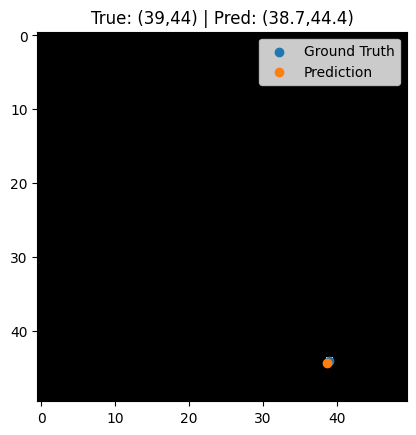

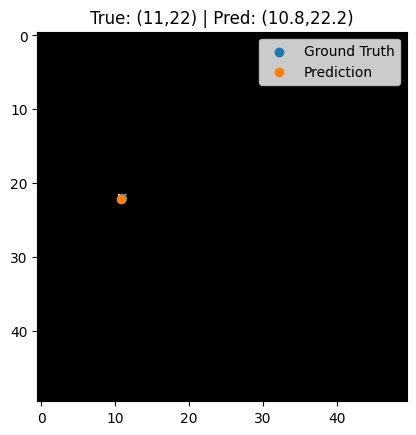

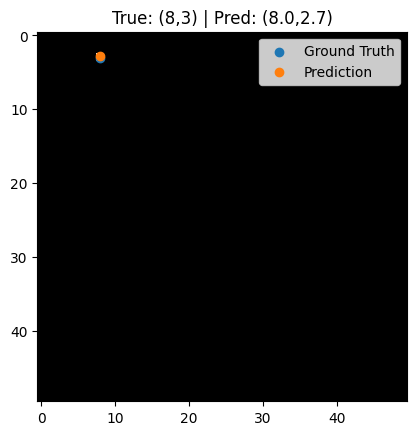

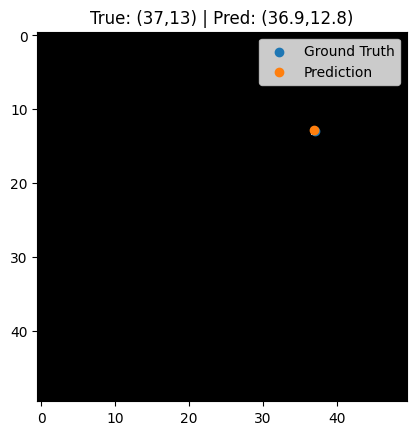

In [22]:
preds = model.predict(X_test)

for i in range(5):
    img = X_test[i].reshape(50, 50)
    true_x, true_y = y_test[i]
    pred_x, pred_y = preds[i]

    plt.imshow(img, cmap='gray')
    plt.scatter(true_x, true_y, label='Ground Truth')
    plt.scatter(pred_x, pred_y, label='Prediction')
    plt.legend()
    plt.title(f"True: ({true_x},{true_y}) | Pred: ({pred_x:.1f},{pred_y:.1f})")
    plt.show()
